In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.errors import ShapelyDeprecationWarning
import warnings
plt.rcParams['figure.figsize'] = [12, 12]  # add more space to figures

In [4]:
vtds = gpd.read_file('geo/MI_VTDs_2020/MI_VTDs_2020.shp')

In [5]:
vtds = vtds.dissolve(by="GEOID20").reset_index()  # combine VTD areas that have same name
vtds = vtds.rename(columns={"GEOID20":"VTD_ID"})  # rename identifying column for simplicity
vtds = vtds[["VTD_ID","geometry"]]

In [6]:
bgs = gpd.read_file('~/Downloads/mi_acs5_2018_bg/mi_acs5_2018_bg.shp')

In [7]:
bgs.columns

Index(['GEOID', 'NAME', 'STATE', 'COUNTY', 'TOTPOP18', 'TOTPOPMOE', 'N_HISP18',
       'N_HISPMOE', 'WHT_NH18', 'WHT_NHMOE', 'BLK_NH18', 'BLK_NHMOE', 'HISP18',
       'HISPMOE', 'WHT_H18', 'WHT_HMOE', 'BLK_H18', 'BLK_HMOE', 'BLK_ALL18',
       'BLK_ALLMOE', 'AIA_ALL18', 'AIA_ALLMOE', 'ASN_ALL18', 'ASN_ALLMOE',
       'NHP_ALL18', 'NHP_ALLMOE', 'OTH_ALL18', 'OTH_ALLMOE', 'STATEFP',
       'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'geometry'],
      dtype='object')

In [8]:
bgs = bgs.rename(columns={
    "GEOID":"BG_ID",
    "TOTPOP18":"total pop",
    "WHT_NH18":"white",
    "BLK_NH18":"black",
    "HISP18":"hispanic",
    "ASN_ALL18":"asian",
    "AIA_ALL18":"native american"
    })
bgs = bgs[["BG_ID","NAME","geometry","total pop","white","black","hispanic","asian","native american"]]

In [9]:
data1 = pd.read_csv('~/Downloads/ACSDT5Y2018/ACSDT5Y2018.B07201_data_with_overlays_2022-05-27T122046.csv')

In [10]:
data2 = pd.read_csv('~/Downloads/ACSDT5Y2018-2/ACSDT5Y2018.B11001_data_with_overlays_2022-05-27T122448.csv')

In [11]:
data3 = pd.read_csv('~/Downloads/ACSDT5Y2018-3/ACSDT5Y2018.B15003_data_with_overlays_2022-05-27T122505.csv')

In [12]:
data4 = pd.read_csv('~/Downloads/ACSDT5Y2018-4/ACSDT5Y2018.B19001_data_with_overlays_2022-05-27T122522.csv')

In [13]:
data1 = data1.iloc[1:]
data2 = data2.iloc[1:]
data3 = data3.iloc[1:]
data4 = data4.iloc[1:]
data1['GEO_ID']=data1['GEO_ID'].astype(str).str[9:]
data2['GEO_ID']=data2['GEO_ID'].astype(str).str[9:]
data3['GEO_ID']=data3['GEO_ID'].astype(str).str[9:]
data4['GEO_ID']=data4['GEO_ID'].astype(str).str[9:]

In [14]:
data1

,B07201_001E,B07201_001M,B07201_002E,B07201_002M,B07201_003E,B07201_003M,B07201_004E,B07201_004M,B07201_005E,B07201_005M,...,B07201_011E,B07201_011M,B07201_012E,B07201_012M,B07201_013E,B07201_013M,B07201_014E,B07201_014M,GEO_ID,NAME
1,0,10,0,10,0,10,0,10,0,10,...,0,10,0,10,0,10,0,10,260010001001,"Block Group 1, Census Tract 1, Alcona County, ..."
2,0,10,0,10,0,10,0,10,0,10,...,0,10,0,10,0,10,0,10,260010001002,"Block Group 2, Census Tract 1, Alcona County, ..."
3,0,10,0,10,0,10,0,10,0,10,...,0,10,0,10,0,10,0,10,260019701001,"Block Group 1, Census Tract 9701, Alcona Count..."
4,0,10,0,10,0,10,0,10,0,10,...,0,10,0,10,0,10,0,10,260019701002,"Block Group 2, Census Tract 9701, Alcona Count..."
5,0,10,0,10,0,10,0,10,0,10,...,0,10,0,10,0,10,0,10,260019704001,"Block Group 1, Census Tract 9704, Alcona Count..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8201,0,10,0,10,0,10,0,10,0,10,...,0,10,0,10,0,10,0,10,261653807002,"Block Group 2, Census Tract 3807, Wexford Coun..."
8202,0,10,0,10,0,10,0,10,0,10,...,0,10,0,10,0,10,0,10,261653807003,"Block Group 3, Census Tract 3807, Wexford Coun..."
8203,0,10,0,10,0,10,0,10,0,10,...,0,10,0,10,0,10,0,10,261653808001,"Block Group 1, Census Tract 3808, Wexford Coun..."
8204,0,10,0,10,0,10,0,10,0,10,...,0,10,0,10,0,10,0,10,261653808002,"Block Group 2, Census Tract 3808, Wexford Coun..."


In [15]:
data1 = data1.rename(columns={
    'GEO_ID':'BG_ID',
    'B07201_001E':'TOT_people',
    'B07201_002E':'Same house',
    'B07201_004E':'Different house in same area',
    'B07201_007E':'Different house elsewhere in US',
    'B07201_014E':'Abroad'
})
data1 = data1[['BG_ID','TOT_people','Same house','Different house in same area','Different house elsewhere in US','Abroad']]
data1 = data1.astype('int')
data1

,BG_ID,TOT_people,Same house,Different house in same area,Different house elsewhere in US,Abroad
1,260010001001,0,0,0,0,0
2,260010001002,0,0,0,0,0
3,260019701001,0,0,0,0,0
4,260019701002,0,0,0,0,0
5,260019704001,0,0,0,0,0
...,...,...,...,...,...,...
8201,261653807002,0,0,0,0,0
8202,261653807003,0,0,0,0,0
8203,261653808001,0,0,0,0,0
8204,261653808002,0,0,0,0,0


In [16]:
data2

,B11001_001E,B11001_001M,B11001_002E,B11001_002M,B11001_003E,B11001_003M,B11001_004E,B11001_004M,B11001_005E,B11001_005M,B11001_006E,B11001_006M,B11001_007E,B11001_007M,B11001_008E,B11001_008M,B11001_009E,B11001_009M,GEO_ID,NAME
1,361,48,243,41,228,39,15,10,5,6,10,8,118,28,113,28,5,7,260010001001,"Block Group 1, Census Tract 1, Alcona County, ..."
2,533,56,330,42,292,41,38,17,12,9,26,15,203,42,177,38,26,15,260010001002,"Block Group 2, Census Tract 1, Alcona County, ..."
3,534,48,351,36,303,39,48,25,11,9,37,21,183,38,155,33,28,17,260019701001,"Block Group 1, Census Tract 9701, Alcona Count..."
4,583,53,351,46,268,38,83,29,15,12,68,28,232,39,211,39,21,11,260019701002,"Block Group 2, Census Tract 9701, Alcona Count..."
5,645,60,346,46,241,39,105,31,55,23,50,21,299,46,248,37,51,29,260019704001,"Block Group 1, Census Tract 9704, Alcona Count..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8201,489,79,373,73,217,61,156,61,32,28,124,52,116,50,106,51,10,17,261653807002,"Block Group 2, Census Tract 3807, Wexford Coun..."
8202,373,93,124,62,92,51,32,31,22,26,10,17,249,76,229,74,20,23,261653807003,"Block Group 3, Census Tract 3807, Wexford Coun..."
8203,435,94,251,66,213,61,38,34,19,29,19,20,184,95,184,95,0,10,261653808001,"Block Group 1, Census Tract 3808, Wexford Coun..."
8204,347,75,220,66,154,59,66,49,0,10,66,49,127,53,118,50,9,14,261653808002,"Block Group 2, Census Tract 3808, Wexford Coun..."


In [17]:
data2 = data2.rename(columns={
    'GEO_ID':'BG_ID',
    'B11001_001E':'TOT_households',
    'B11001_003E':'Married couple',
    'B11001_007E':'Nonfamily'
})
data2 = data2[['BG_ID','TOT_households','Married couple','Nonfamily']]
data2 = data2.astype('int')
data2

,BG_ID,TOT_households,Married couple,Nonfamily
1,260010001001,361,228,118
2,260010001002,533,292,203
3,260019701001,534,303,183
4,260019701002,583,268,232
5,260019704001,645,241,299
...,...,...,...,...
8201,261653807002,489,217,116
8202,261653807003,373,92,249
8203,261653808001,435,213,184
8204,261653808002,347,154,127


In [18]:
data3

,B15003_001E,B15003_001M,B15003_002E,B15003_002M,B15003_003E,B15003_003M,B15003_004E,B15003_004M,B15003_005E,B15003_005M,...,B15003_022E,B15003_022M,B15003_023E,B15003_023M,B15003_024E,B15003_024M,B15003_025E,B15003_025M,GEO_ID,NAME
1,609,81,0,10,0,10,0,10,0,10,...,113,33,24,10,33,20,11,9,260010001001,"Block Group 1, Census Tract 1, Alcona County, ..."
2,887,75,3,4,0,10,0,10,0,10,...,124,41,93,29,7,7,0,10,260010001002,"Block Group 2, Census Tract 1, Alcona County, ..."
3,943,80,9,6,0,10,0,10,0,10,...,106,29,30,14,23,28,4,4,260019701001,"Block Group 1, Census Tract 9701, Alcona Count..."
4,1020,91,22,20,0,10,0,10,0,10,...,113,28,73,24,13,9,5,6,260019701002,"Block Group 2, Census Tract 9701, Alcona Count..."
5,1071,104,21,17,0,10,0,10,0,10,...,52,19,33,19,9,6,5,5,260019704001,"Block Group 1, Census Tract 9704, Alcona Count..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8201,901,166,10,15,0,10,0,10,0,10,...,127,73,5,9,0,10,8,13,261653807002,"Block Group 2, Census Tract 3807, Wexford Coun..."
8202,546,149,0,10,0,10,0,10,0,10,...,70,35,21,21,0,10,0,10,261653807003,"Block Group 3, Census Tract 3807, Wexford Coun..."
8203,543,108,0,10,0,10,0,10,0,10,...,79,46,53,49,27,24,0,10,261653808001,"Block Group 1, Census Tract 3808, Wexford Coun..."
8204,579,150,25,35,0,10,0,10,0,10,...,107,78,25,22,0,10,0,10,261653808002,"Block Group 2, Census Tract 3808, Wexford Coun..."


In [19]:
data3 = data3.drop(columns="NAME")
data3 = data3.astype('int')
data3["higher degree"] = data3.B15003_023E+data3.B15003_024E+data3.B15003_025E
data3 = data3.rename(columns={
    'GEO_ID':'BG_ID',
    'B15003_001E':'TOT pop over 25',
    'B15003_007E':'high school diploma',
    'B15003_020E':'some college no degree',
    'B15003_022E':'bachelors degree'
})
data3 = data3[['BG_ID','TOT pop over 25','high school diploma','some college no degree','bachelors degree','higher degree']]
data3

,BG_ID,TOT pop over 25,high school diploma,some college no degree,bachelors degree,higher degree
1,260010001001,609,0,106,113,68
2,260010001002,887,3,111,124,100
3,260019701001,943,0,158,106,57
4,260019701002,1020,0,228,113,91
5,260019704001,1071,0,196,52,47
...,...,...,...,...,...,...
8201,261653807002,901,0,186,127,13
8202,261653807003,546,0,144,70,21
8203,261653808001,543,0,51,79,80
8204,261653808002,579,0,158,107,25


In [20]:
data4

,B19001_001E,B19001_001M,B19001_002E,B19001_002M,B19001_003E,B19001_003M,B19001_004E,B19001_004M,B19001_005E,B19001_005M,...,B19001_014E,B19001_014M,B19001_015E,B19001_015M,B19001_016E,B19001_016M,B19001_017E,B19001_017M,GEO_ID,NAME
1,361,48,17,15,6,6,9,6,12,7,...,27,16,7,7,10,8,6,6,260010001001,"Block Group 1, Census Tract 1, Alcona County, ..."
2,533,56,27,12,51,20,40,24,58,25,...,29,14,28,19,21,12,5,6,260010001002,"Block Group 2, Census Tract 1, Alcona County, ..."
3,534,48,21,10,36,21,40,17,14,13,...,21,10,20,17,6,5,7,6,260019701001,"Block Group 1, Census Tract 9701, Alcona Count..."
4,583,53,56,20,37,18,28,11,55,25,...,11,8,6,6,6,8,13,8,260019701002,"Block Group 2, Census Tract 9701, Alcona Count..."
5,645,60,74,29,54,22,60,24,49,22,...,24,15,11,8,4,4,0,10,260019704001,"Block Group 1, Census Tract 9704, Alcona Count..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8201,489,79,57,43,49,31,24,24,38,24,...,20,24,0,10,8,13,9,14,261653807002,"Block Group 2, Census Tract 3807, Wexford Coun..."
8202,373,93,60,38,39,44,20,24,14,20,...,29,27,0,10,0,10,17,18,261653807003,"Block Group 3, Census Tract 3807, Wexford Coun..."
8203,435,94,33,39,19,29,41,46,27,23,...,0,10,0,10,9,15,10,15,261653808001,"Block Group 1, Census Tract 3808, Wexford Coun..."
8204,347,75,42,43,24,27,7,11,55,35,...,16,18,0,10,0,10,0,10,261653808002,"Block Group 2, Census Tract 3808, Wexford Coun..."


In [21]:
data4 = data4.drop(columns="NAME")
data4 = data4.astype('int')
data4['under 30k']=data4.B19001_002E+data4.B19001_003E+data4.B19001_004E+data4.B19001_005E+data4.B19001_006E
data4['30 to 50 k']=data4.B19001_007E+data4.B19001_008E+data4.B19001_009E+data4.B19001_010E
data4['50 to 100 k']=data4.B19001_011E+data4.B19001_012E+data4.B19001_013E
data4['more than 100k']=data4.B19001_014E+data4.B19001_015E+data4.B19001_016E+data4.B19001_017E
data4 = data4.rename(columns={
    'GEO_ID':'BG_ID',
    'B19001_001E':'TOT_households',
})
data4 = data4[['BG_ID','under 30k','30 to 50 k','50 to 100 k','more than 100k']]  # drop TOT_households because it's already included
data4

,BG_ID,under 30k,30 to 50 k,50 to 100 k,more than 100k
1,260010001001,75,70,166,50
2,260010001002,208,90,152,83
3,260019701001,137,143,200,54
4,260019701002,241,124,182,36
5,260019704001,310,151,145,39
...,...,...,...,...,...
8201,261653807002,225,127,100,37
8202,261653807003,189,76,62,46
8203,261653808001,162,94,160,19
8204,261653808002,151,123,57,16


In [22]:
len(set(data1.BG_ID).intersection(set(pd.to_numeric(bgs.BG_ID))))

8205

In [23]:
bgs["BG_ID"] = pd.to_numeric(bgs["BG_ID"])

In [24]:
bgs = pd.merge(bgs,data1,on='BG_ID')
bgs = pd.merge(bgs,data2,on='BG_ID')
bgs = pd.merge(bgs,data3,on='BG_ID')
bgs = pd.merge(bgs,data4,on='BG_ID')
bgs.sort_values(by="BG_ID")

,BG_ID,NAME,geometry,total pop,white,black,hispanic,asian,native american,TOT_people,...,Nonfamily,TOT pop over 25,high school diploma,some college no degree,bachelors degree,higher degree,under 30k,30 to 50 k,50 to 100 k,more than 100k
4738,260010001001,"Block Group 1, Census Tract 1, Alcona County, ...","POLYGON ((-83.60202 44.81414, -83.60181 44.814...",665,656,2,2,3,0,0,...,118,609,0,106,113,68,75,70,166,50
4739,260010001002,"Block Group 2, Census Tract 1, Alcona County, ...","POLYGON ((-83.60851 44.84936, -83.60850 44.849...",1036,1012,0,3,6,2,0,...,203,887,3,111,124,100,208,90,152,83
7186,260019701001,"Block Group 1, Census Tract 9701, Alcona Count...","POLYGON ((-83.42400 44.85871, -83.42016 44.858...",1150,1113,0,16,2,10,0,...,183,943,0,158,106,57,137,143,200,54
4540,260019701002,"Block Group 2, Census Tract 9701, Alcona Count...","POLYGON ((-83.34274 44.68523, -83.34211 44.685...",1253,1168,18,24,11,22,0,...,232,1020,0,228,113,91,241,124,182,36
7184,260019704001,"Block Group 1, Census Tract 9704, Alcona Count...","POLYGON ((-83.52616 44.75356, -83.52616 44.754...",1463,1405,3,24,1,11,0,...,299,1071,0,196,52,47,310,151,145,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,261653807002,"Block Group 2, Census Tract 3807, Wexford Coun...","POLYGON ((-85.43664 44.25236, -85.43663 44.252...",1269,1235,0,0,0,11,0,...,116,901,0,186,127,13,225,127,100,37
426,261653807003,"Block Group 3, Census Tract 3807, Wexford Coun...","POLYGON ((-85.41793 44.24909, -85.41793 44.249...",662,662,0,0,0,0,0,...,249,546,0,144,70,21,189,76,62,46
2347,261653808001,"Block Group 1, Census Tract 3808, Wexford Coun...","POLYGON ((-85.45546 44.23967, -85.45289 44.239...",833,729,0,93,0,11,0,...,184,543,0,51,79,80,162,94,160,19
2968,261653808002,"Block Group 2, Census Tract 3808, Wexford Coun...","POLYGON ((-85.42116 44.24135, -85.42010 44.241...",854,757,0,0,0,97,0,...,127,579,0,158,107,25,151,123,57,16


In [25]:
bgs.iloc[425]

BG_ID                                                                   261653807002
NAME                               Block Group 2, Census Tract 3807, Wexford Coun...
geometry                           POLYGON ((-85.436641 44.252356, -85.436634 44....
total pop                                                                       1269
white                                                                           1235
black                                                                              0
hispanic                                                                           0
asian                                                                              0
native american                                                                   11
TOT_people                                                                         0
Same house                                                                         0
Different house in same area                                     

For some reason the mobility info is missing for some precincts. For this reason we won't include it.

In [26]:
bgs = bgs[['BG_ID', 'NAME', 'geometry', 'total pop', 'white', 'black', 'hispanic',
       'asian', 'native american', 'TOT_households', 'Married couple', 'Nonfamily',
       'TOT pop over 25', 'high school diploma', 'some college no degree',
       'bachelors degree', 'higher degree', 'under 30k',
       '30 to 50 k', '50 to 100 k', 'more than 100k']]

In [27]:
def simple_map(data,boundary=True,variable=None,title=None):
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
        # For some reason, below line prints deprecation warning for some but not all geometries
        # ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0.
        if variable is not None:
            fig = data.plot(column=variable,legend=True)
            if title is None:
                title = variable
        elif boundary:
            fig = data.boundary.plot()
        else:
            fig = data.plot()
        if title is not None:
            plt.title(title)
        return fig

<AxesSubplot:>

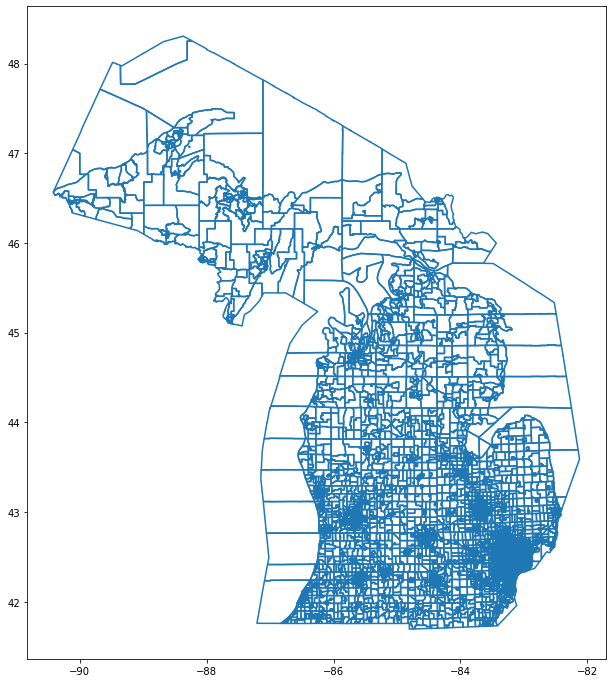

In [28]:
bgs.boundary.plot()

In [29]:
# reproject geometries to equal-area projection to ensure we get accurate areas
vtds = vtds.to_crs("EPSG:5070")
bgs = bgs.to_crs("EPSG:5070")

In [30]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    overlap = gpd.overlay(vtds.drop(columns='area'),bgs.drop(columns='area'),how='union')
overlap['area'] = overlap.apply(lambda row: row.geometry.area,axis=1)  # force-recalculate areas

KeyError: "['area'] not found in axis"

In [ ]:
overlap = overlap.dropna(subset="VTD_ID")  # drop block fragments that don't overlap with precincts
overlap = overlap.dropna(subset="BG_ID")  # drop precinct fragments that don't overlap with blocks

In [ ]:
# now we will add two columns to overlap:
# the fraction of relevant vtd in each intersected area
overlap["vtd_frac"] = 0
# the fraction of relevant bg in each intersected area
overlap["bg_frac"] = 0

overlap.columns

Index(['VTD_ID', 'BG_ID', 'NAME', 'total pop', 'white', 'black', 'hispanic',
       'asian', 'native american', 'TOT_households', 'Married couple',
       'Nonfamily', 'TOT pop over 25', 'high school diploma',
       'some college no degree', 'bachelors degree', 'higher degree',
       'under 30k', '30 to 50 k', '50 to 100 k', 'more than 100k', 'geometry',
       'area', 'vtd_frac', 'bg_frac'],
      dtype='object')

In [ ]:
# force recalculate areas
vtds['area'] = vtds.apply(lambda row: row.geometry.area,axis=1)
bgs['area'] = bgs.apply(lambda row: row.geometry.area,axis=1)
overlap['area'] = overlap.apply(lambda row: row.geometry.area,axis=1)

# fill in (may take ~30 seconds):
for row_index in range(len(overlap)):
    area = overlap.iloc[row_index]['area']  # fetches area
    vtd_num = overlap.iat[row_index,0]  # fetches vtd_num
    vtd_area = vtds[vtds.VTD_ID==vtd_num].area
    overlap.iat[row_index,23] = area/vtd_area  # sets vtd_frac
    bg_num = overlap.iat[row_index,1]  # fetches bg
    bg_area = bgs[bgs.BG_ID==bg_num].area
    overlap.iat[row_index,24] = area/bg_area  # sets bg_frac

overlap.head()

,VTD_ID,BG_ID,NAME,total pop,white,black,hispanic,asian,native american,TOT_households,...,bachelors degree,higher degree,under 30k,30 to 50 k,50 to 100 k,more than 100k,geometry,area,vtd_frac,bg_frac
0,26001001001,2.600197e+11,"Block Group 2, Census Tract 9705, Alcona Count...",532.0,510.0,0.0,17.0,0.0,5.0,274.0,...,38.0,13.0,110.0,87.0,60.0,17.0,"POLYGON ((973405.620 2483596.969, 973412.003 2...",2.333277e+07,0.137475,0.049696
1,26001001002,2.600197e+11,"Block Group 2, Census Tract 9705, Alcona Count...",532.0,510.0,0.0,17.0,0.0,5.0,274.0,...,38.0,13.0,110.0,87.0,60.0,17.0,"POLYGON ((963761.740 2482787.046, 963728.165 2...",1.093286e+08,0.580412,0.232855
2,26001001008,2.600197e+11,"Block Group 2, Census Tract 9705, Alcona Count...",532.0,510.0,0.0,17.0,0.0,5.0,274.0,...,38.0,13.0,110.0,87.0,60.0,17.0,"POLYGON ((973491.164 2482055.688, 973509.825 2...",8.626496e+07,0.466249,0.183733
3,26001001011,2.600197e+11,"Block Group 2, Census Tract 9705, Alcona Count...",532.0,510.0,0.0,17.0,0.0,5.0,274.0,...,38.0,13.0,110.0,87.0,60.0,17.0,"MULTIPOLYGON (((967413.642 2472912.058, 967601...",1.414251e+07,0.076615,0.030122
4,26001001012,2.600197e+11,"Block Group 2, Census Tract 9705, Alcona Count...",532.0,510.0,0.0,17.0,0.0,5.0,274.0,...,38.0,13.0,110.0,87.0,60.0,17.0,"POLYGON ((955058.361 2475639.512, 955039.627 2...",2.364447e+08,0.636565,0.503595


In [ ]:
overlap.columns

Index(['VTD_ID', 'BG_ID', 'NAME', 'total pop', 'white', 'black', 'hispanic',
       'asian', 'native american', 'TOT_households', 'Married couple',
       'Nonfamily', 'TOT pop over 25', 'high school diploma',
       'some college no degree', 'bachelors degree', 'higher degree',
       'under 30k', '30 to 50 k', '50 to 100 k', 'more than 100k', 'geometry',
       'area', 'vtd_frac', 'bg_frac'],
      dtype='object')

In [ ]:
# assuming homogeneous block groups, calculate population stats per bg fragment
overlap["total_pop"] = overlap["total pop"]*overlap.bg_frac
overlap["abs_white"] = overlap["white"]*overlap.bg_frac
overlap["abs_Black"] = overlap["black"]*overlap.bg_frac
overlap["abs_Hispanic"] = overlap["hispanic"]*overlap.bg_frac
overlap["abs_AIA"] = overlap["native american"]*overlap.bg_frac
overlap["abs_Asian"] = overlap["asian"]*overlap.bg_frac
overlap["total_households"] = overlap["TOT_households"]*overlap.bg_frac
overlap["abs_married"] = overlap["Married couple"]*overlap.bg_frac
overlap["abs_nonfamily"] = overlap["Nonfamily"]*overlap.bg_frac
overlap["total_pop_over25"] = overlap["TOT pop over 25"]*overlap.bg_frac
overlap["abs_hs_diploma"] = overlap["high school diploma"]*overlap.bg_frac
overlap["abs_some_college"] = overlap["some college no degree"]*overlap.bg_frac
overlap["abs_bachelors"] = overlap["bachelors degree"]*overlap.bg_frac
overlap["abs_higher"] = overlap["higher degree"]*overlap.bg_frac
overlap["under_30k"] = overlap["under 30k"]*overlap.bg_frac
overlap["30_to_50k"] = overlap["30 to 50 k"]*overlap.bg_frac
overlap["50_to_100k"] = overlap["50 to 100 k"]*overlap.bg_frac
overlap["more_than_100k"] = overlap["more than 100k"]*overlap.bg_frac


In [ ]:
grouped_vtds = overlap.groupby("VTD_ID")
output_vtds = grouped_vtds.sum()
output_vtds = output_vtds.reset_index()

In [ ]:
output_vtds["pop_density"] = output_vtds["total pop"]/output_vtds["area"]
output_vtds["prop_white"] = output_vtds["abs_white"]/output_vtds["total_pop"]
output_vtds["prop_Black"] = output_vtds["abs_Black"]/output_vtds["total_pop"]
output_vtds["prop_Hispanic"] = output_vtds["abs_Hispanic"]/output_vtds["total_pop"]
output_vtds["prop_AIA"] = output_vtds["abs_AIA"]/output_vtds["total_pop"]
output_vtds["prop_Asian"] = output_vtds["abs_Asian"]/output_vtds["total_pop"]
output_vtds["prop_married"] = output_vtds["abs_married"]/output_vtds["total_households"]
output_vtds["prop_nonfamily"] = output_vtds["abs_nonfamily"]/output_vtds["total_households"]
output_vtds["prop_family_nonmarried"] = 1 - output_vtds["prop_married"] - output_vtds["prop_nonfamily"]
output_vtds["prop_hs_diploma"] = output_vtds["abs_hs_diploma"]/output_vtds["total_pop_over25"]
output_vtds["prop_some_college"] = output_vtds["abs_some_college"]/output_vtds["total_pop_over25"]
output_vtds["prop_bachelors"] = output_vtds["abs_bachelors"]/output_vtds["total_pop_over25"]
output_vtds["prop_higher"] = output_vtds["abs_higher"]/output_vtds["total_pop_over25"]
output_vtds["prop_under_hs"] = 1 - output_vtds["prop_hs_diploma"] - output_vtds["prop_some_college"] - output_vtds["prop_bachelors"] - output_vtds["prop_higher"]
output_vtds["prop_under_30k"] = output_vtds["under_30k"]/output_vtds["total_households"]
output_vtds["prop_30_to_50k"] = output_vtds["30_to_50k"]/output_vtds["total_households"]
output_vtds["prop_50_to_100k"] = output_vtds["50_to_100k"]/output_vtds["total_households"]
output_vtds["prop_more_than_100k"] = output_vtds["more_than_100k"]/output_vtds["total_households"]
output_vtds


,VTD_ID,BG_ID,total pop,white,black,hispanic,asian,native american,TOT_households,Married couple,...,prop_family_nonmarried,prop_hs_diploma,prop_some_college,prop_bachelors,prop_higher,prop_under_hs,prop_under_30k,prop_30_to_50k,prop_50_to_100k,prop_more_than_100k
0,26001001001,1.040059e+12,3383.0,3291.0,2.0,38.0,11.0,17.0,1702.0,966.0,...,0.067506,0.000781,0.159600,0.146117,0.091453,0.602049,0.272519,0.216670,0.383058,0.127752
1,26001001002,7.800494e+11,2718.0,2635.0,0.0,36.0,8.0,17.0,1341.0,738.0,...,0.079335,0.002868,0.127402,0.131108,0.100085,0.638538,0.390689,0.190452,0.276680,0.142178
2,26001001003,5.200394e+11,1457.0,1367.0,0.0,41.0,15.0,34.0,754.0,320.0,...,0.086492,0.000000,0.150100,0.076132,0.029278,0.744491,0.425132,0.307724,0.179958,0.087186
3,26001001004,1.040079e+12,4061.0,3861.0,35.0,46.0,27.0,73.0,1907.0,1008.0,...,0.081493,0.000000,0.215217,0.123143,0.028745,0.632895,0.336506,0.257895,0.326713,0.078885
4,26001001005,5.200394e+11,2824.0,2695.0,5.0,43.0,3.0,55.0,1290.0,622.0,...,0.150979,0.000000,0.175692,0.053673,0.040530,0.730105,0.461984,0.228334,0.239768,0.069915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,26165165017,1.569923e+12,8956.0,8583.0,29.0,161.0,98.0,129.0,3500.0,2056.0,...,0.121969,0.003405,0.180882,0.116643,0.081976,0.617093,0.235246,0.229657,0.339395,0.195702
4801,26165165018,2.616538e+11,1288.0,1250.0,6.0,29.0,0.0,3.0,515.0,279.0,...,0.143689,0.000000,0.157110,0.049312,0.030963,0.762615,0.347573,0.283495,0.285437,0.083495
4802,26165165019,5.233076e+11,2708.0,2621.0,6.0,38.0,6.0,35.0,1092.0,607.0,...,0.126614,0.000000,0.124344,0.081335,0.049400,0.744921,0.319067,0.284055,0.338750,0.058128
4803,26165165020,7.849614e+11,4223.0,4043.0,27.0,49.0,28.0,69.0,1701.0,921.0,...,0.134260,0.000000,0.164235,0.068926,0.038507,0.728332,0.349924,0.263310,0.309916,0.076850


<AxesSubplot:>

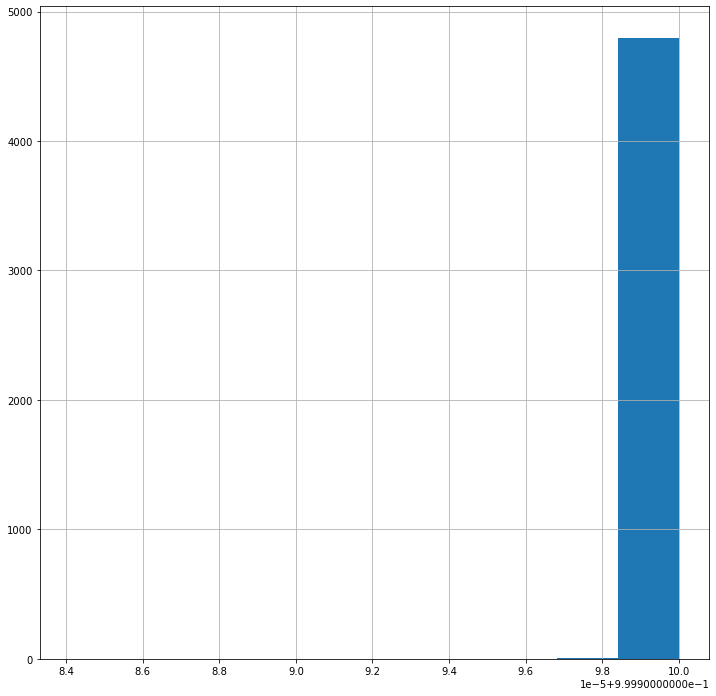

In [ ]:
output_vtds.vtd_frac.hist()

In [ ]:
output_vtds.columns

Index(['VTD_ID', 'BG_ID', 'total pop', 'white', 'black', 'hispanic', 'asian',
       'native american', 'TOT_households', 'Married couple', 'Nonfamily',
       'TOT pop over 25', 'high school diploma', 'some college no degree',
       'bachelors degree', 'higher degree', 'under 30k', '30 to 50 k',
       '50 to 100 k', 'more than 100k', 'area', 'vtd_frac', 'bg_frac',
       'total_pop', 'abs_white', 'abs_Black', 'abs_Hispanic', 'abs_AIA',
       'abs_Asian', 'total_households', 'abs_married', 'abs_nonfamily',
       'total_pop_over25', 'abs_hs_diploma', 'abs_some_college',
       'abs_bachelors', 'abs_higher', 'under_30k', '30_to_50k', '50_to_100k',
       'more_than_100k', 'pop_density', 'prop_white', 'prop_Black',
       'prop_Hispanic', 'prop_AIA', 'prop_Asian', 'prop_married',
       'prop_nonfamily', 'prop_family_nonmarried', 'prop_hs_diploma',
       'prop_some_college', 'prop_bachelors', 'prop_higher', 'prop_under_hs',
       'prop_under_30k', 'prop_30_to_50k', 'prop_50_to_100k'

In [ ]:
output = output_vtds[['VTD_ID','total_pop','pop_density', 'prop_white', 'prop_Black',
       'prop_Hispanic', 'prop_AIA', 'prop_Asian', 'prop_married',
       'prop_nonfamily', 'prop_family_nonmarried', 'prop_hs_diploma',
       'prop_some_college', 'prop_bachelors', 'prop_higher', 'prop_under_hs',
       'prop_under_30k', 'prop_30_to_50k', 'prop_50_to_100k',
       'prop_more_than_100k']]

In [34]:
# merge back to vtds
vtds = pd.merge(vtds,output,on="VTD_ID")

In [ ]:
output.to_csv("data/MI_VTD_demographics.csv",index=False)

In [33]:
# check
pd.read_csv("data/MI_VTD_demographics.csv")

,VTD_ID,total_pop,pop_density,prop_white,prop_Black,prop_Hispanic,prop_AIA,prop_Asian,prop_married,prop_nonfamily,prop_family_nonmarried,prop_hs_diploma,prop_some_college,prop_bachelors,prop_higher,prop_under_hs,prop_under_30k,prop_30_to_50k,prop_50_to_100k,prop_more_than_100k
0,26001001001,1199.706208,0.000020,0.976484,0.001091,0.007787,0.003980,0.003651,0.586734,0.345760,0.067506,0.000781,0.159600,0.146117,0.091453,0.602049,0.272519,0.216670,0.383058,0.127752
1,26001001002,888.447426,0.000014,0.974214,0.000000,0.007050,0.003035,0.004946,0.544382,0.376283,0.079335,0.002868,0.127402,0.131108,0.100085,0.638538,0.390689,0.190452,0.276680,0.142178
2,26001001003,732.583185,0.000008,0.948043,0.000000,0.018285,0.024794,0.008878,0.427789,0.485719,0.086492,0.000000,0.150100,0.076132,0.029278,0.744491,0.425132,0.307724,0.179958,0.087186
3,26001001004,1234.485189,0.000060,0.969429,0.010086,0.003118,0.005656,0.008460,0.521359,0.397147,0.081493,0.000000,0.215217,0.123143,0.028745,0.632895,0.336506,0.257895,0.326713,0.078885
4,26001001005,746.017711,0.000030,0.958360,0.001958,0.016015,0.011473,0.000809,0.410391,0.438630,0.150979,0.000000,0.175692,0.053673,0.040530,0.730105,0.461984,0.228334,0.239768,0.069915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,26165165017,2263.702306,0.000096,0.945013,0.004608,0.020610,0.008239,0.022435,0.582442,0.295589,0.121969,0.003405,0.180882,0.116643,0.081976,0.617093,0.235246,0.229657,0.339395,0.195702
4801,26165165018,706.378252,0.000014,0.970497,0.004658,0.022516,0.002329,0.000000,0.541748,0.314563,0.143689,0.000000,0.157110,0.049312,0.030963,0.762615,0.347573,0.283495,0.285437,0.083495
4802,26165165019,499.350584,0.000029,0.966692,0.001116,0.010215,0.017693,0.003213,0.562134,0.311252,0.126614,0.000000,0.124344,0.081335,0.049400,0.744921,0.319067,0.284055,0.338750,0.058128
4803,26165165020,771.989062,0.000046,0.954362,0.008375,0.012670,0.015137,0.007649,0.533309,0.332431,0.134260,0.000000,0.164235,0.068926,0.038507,0.728332,0.349924,0.263310,0.309916,0.076850


In [35]:
def simple_choropleth(data,variable,title=None):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
        # For some reason, below line prints deprecation warning for some but not all geometries
        # (for example, for community_areas but not for tracts)
        # ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0.
        data.plot(column=variable,legend=True)
        if title is None:
            title = variable
        plt.title(title)
        plt.show()

In [47]:
vtds.columns

Index(['VTD_ID', 'geometry', 'total_pop', 'pop_density', 'prop_white',
       'prop_Black', 'prop_Hispanic', 'prop_AIA', 'prop_Asian', 'prop_married',
       'prop_nonfamily', 'prop_family_nonmarried', 'prop_hs_diploma',
       'prop_some_college', 'prop_bachelors', 'prop_higher', 'prop_under_hs',
       'prop_under_30k', 'prop_30_to_50k', 'prop_50_to_100k',
       'prop_more_than_100k'],
      dtype='object')

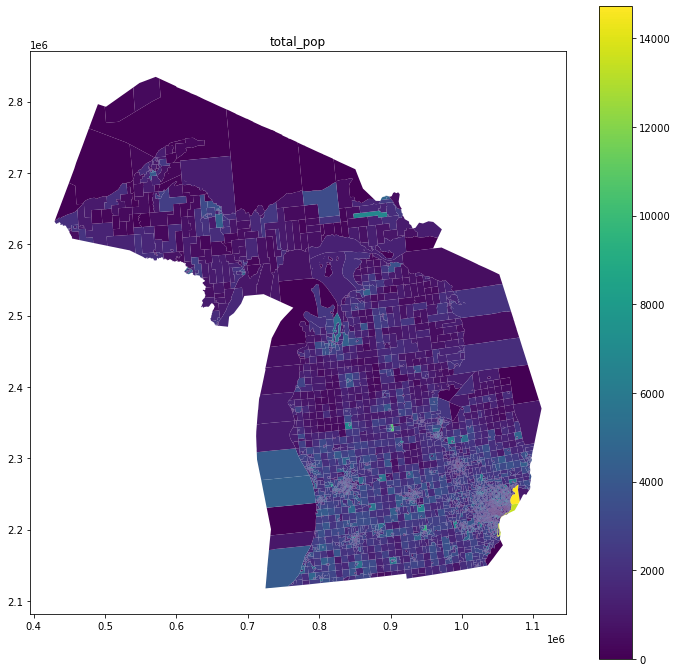

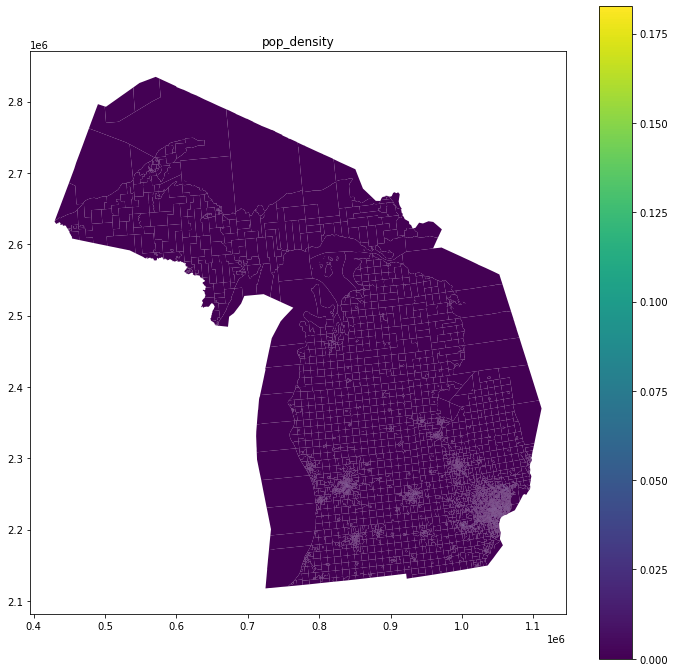

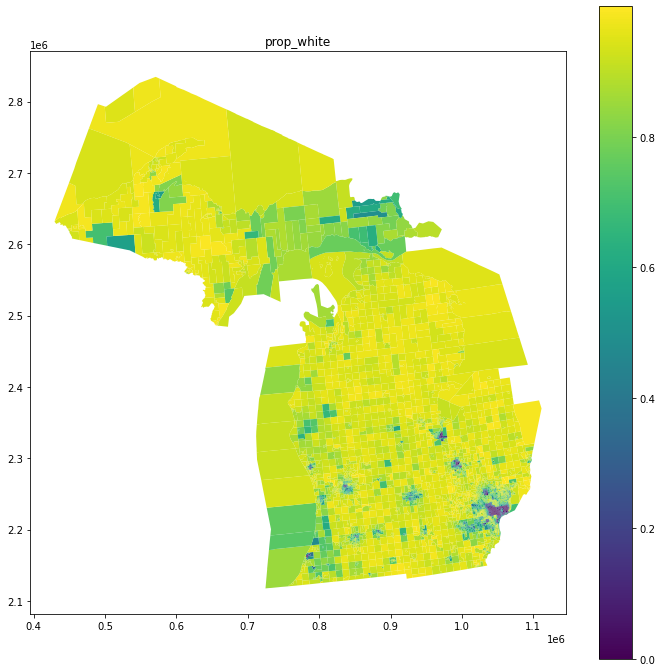

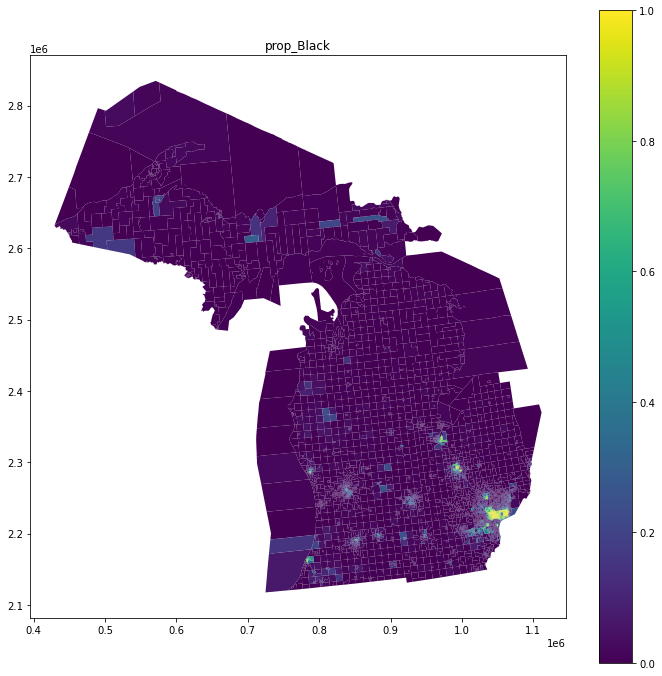

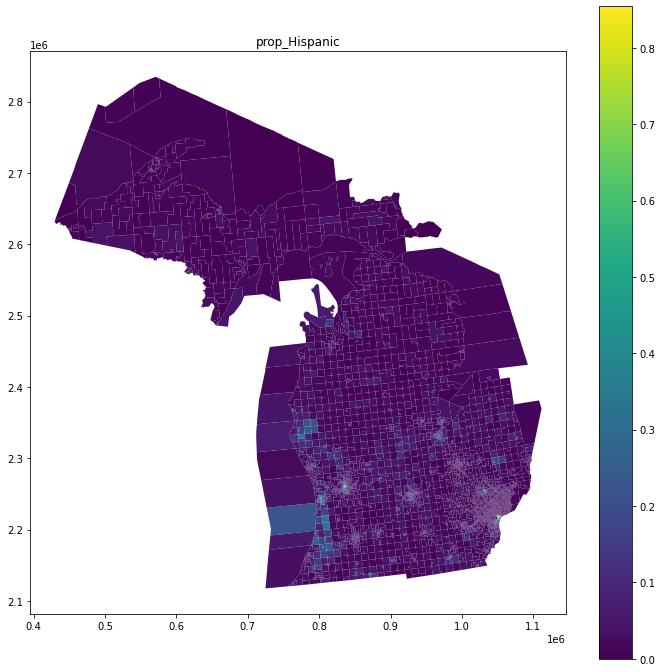

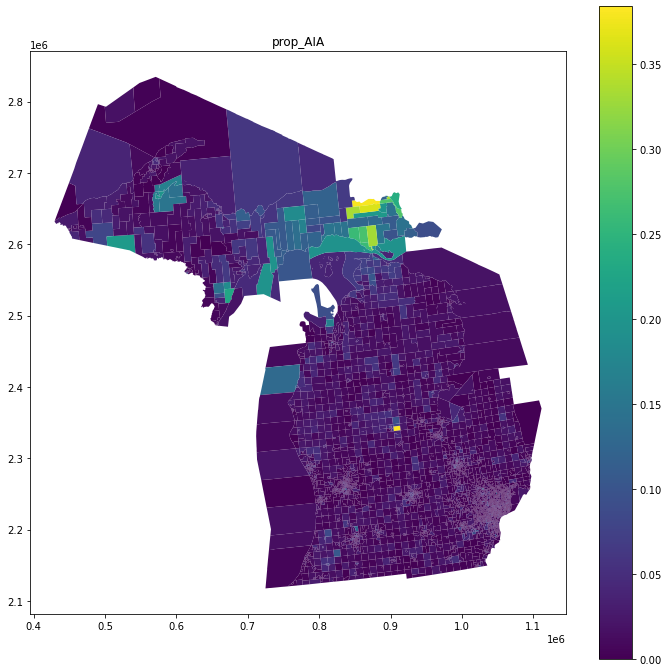

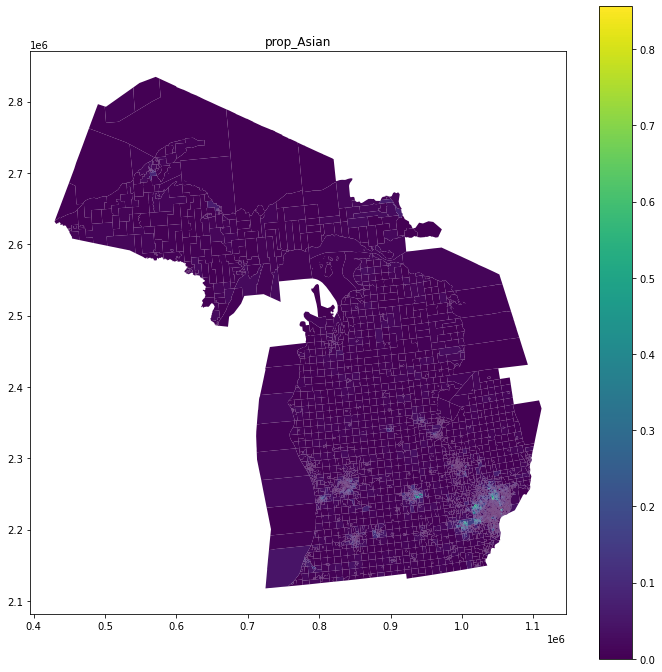

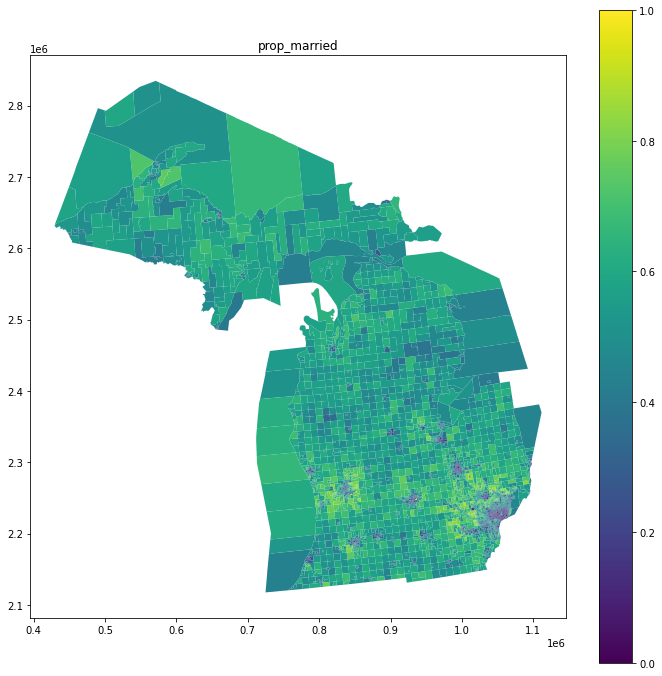

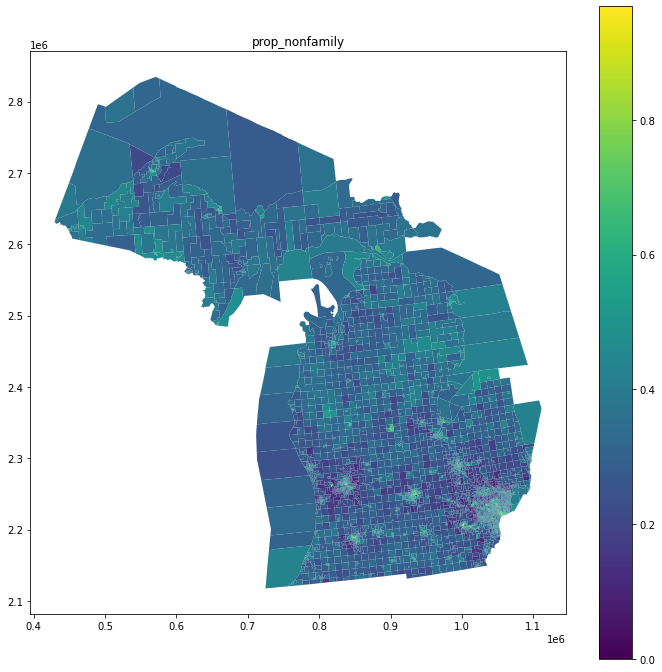

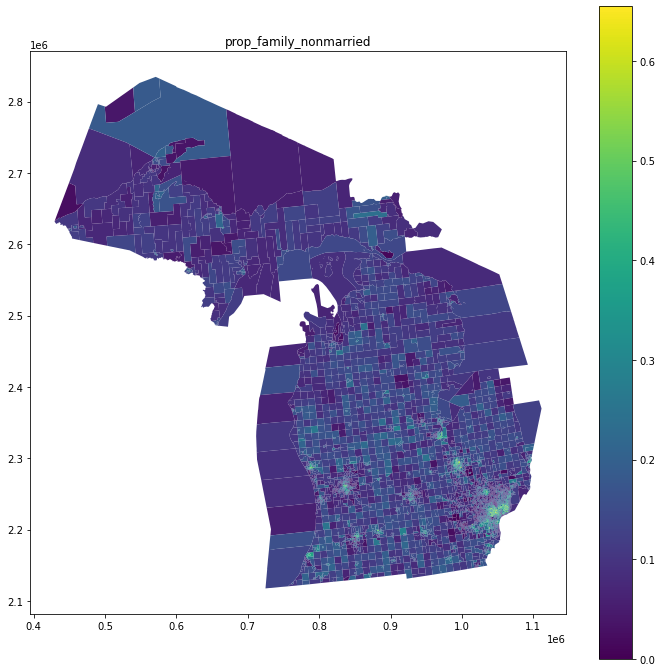

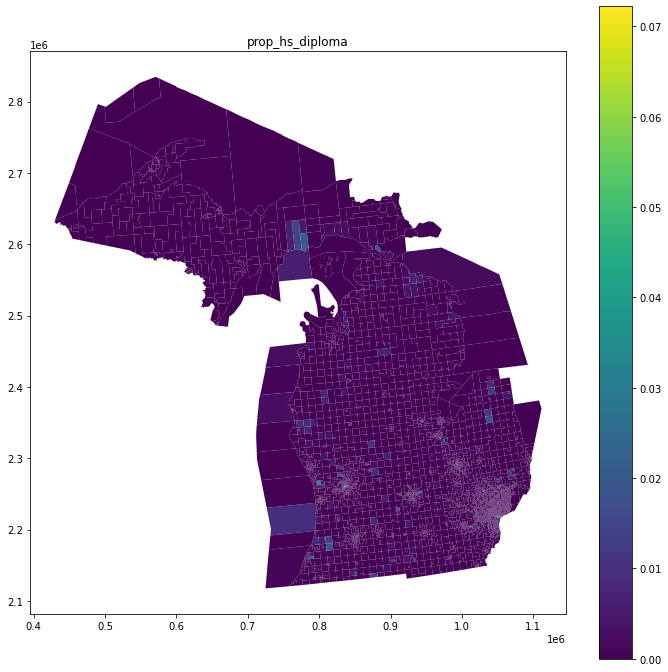

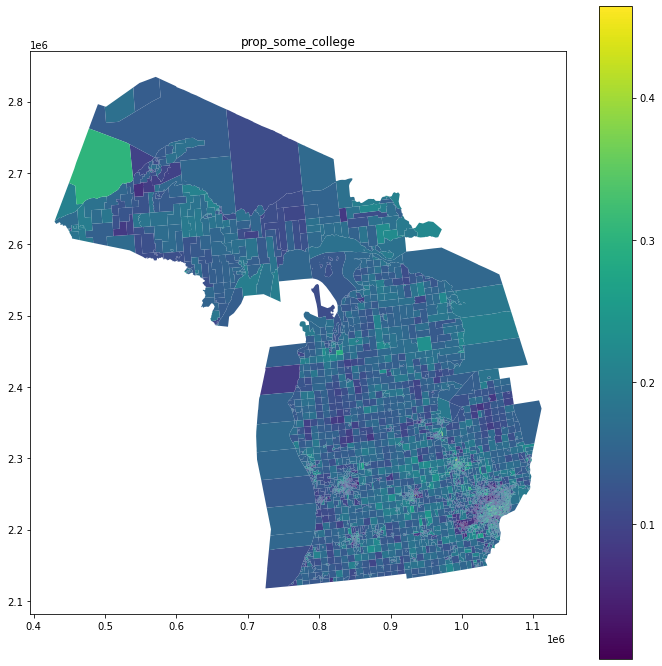

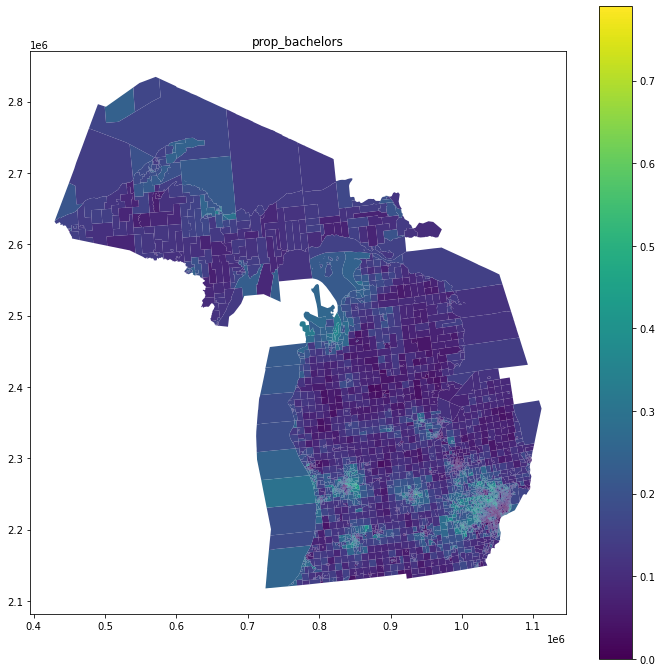

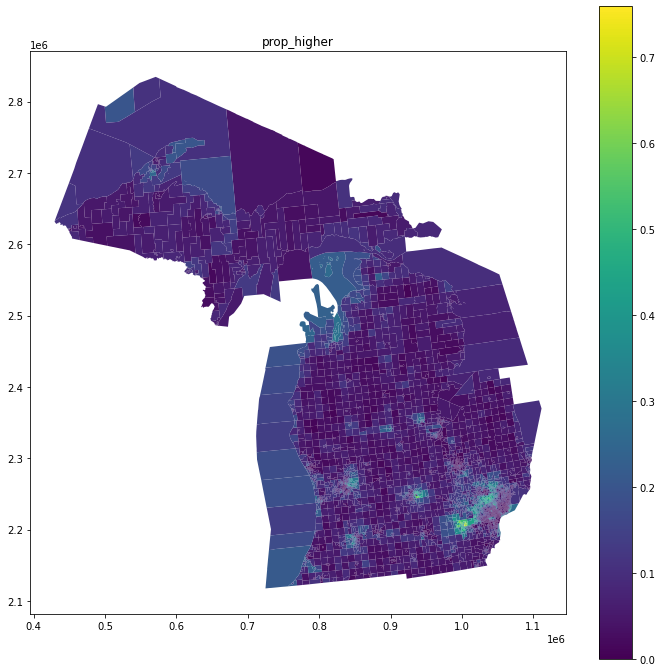

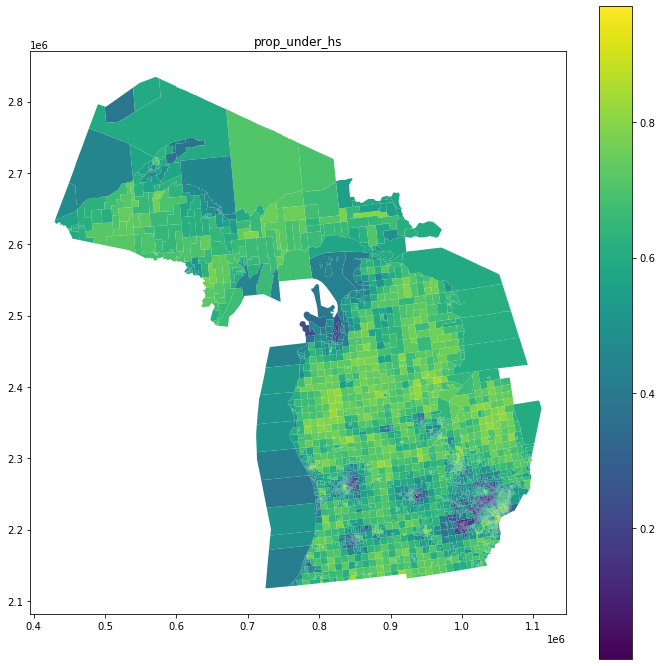

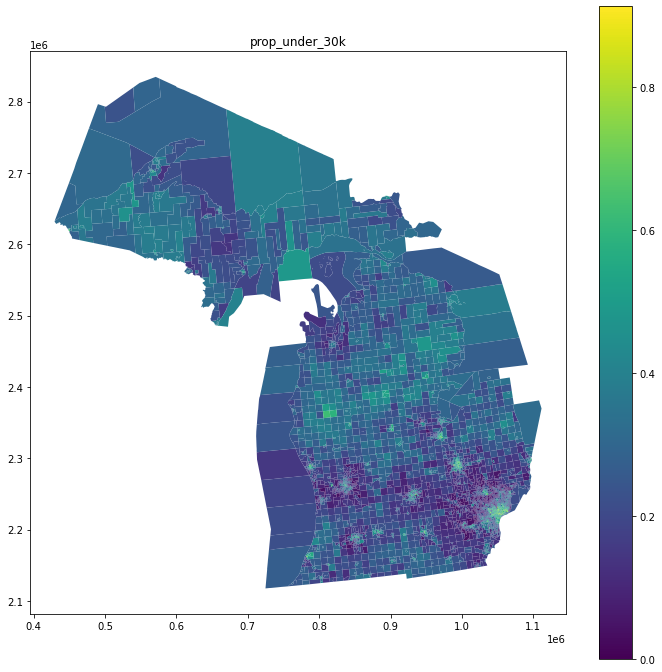

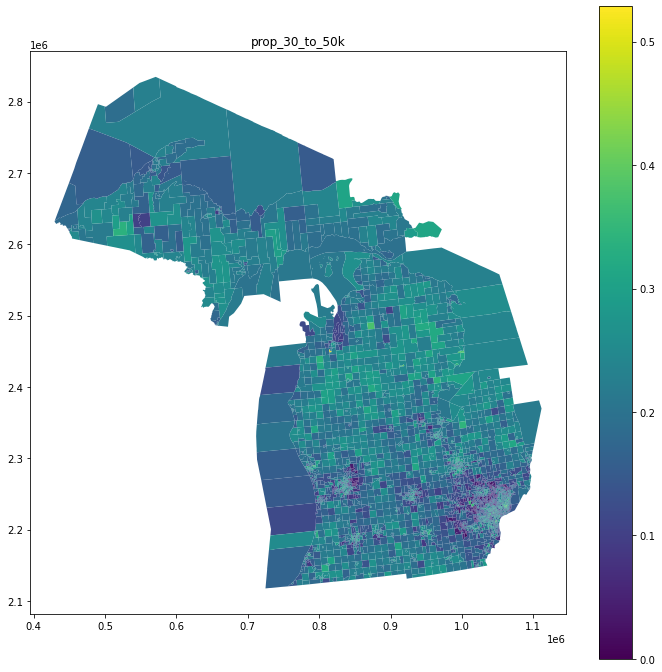

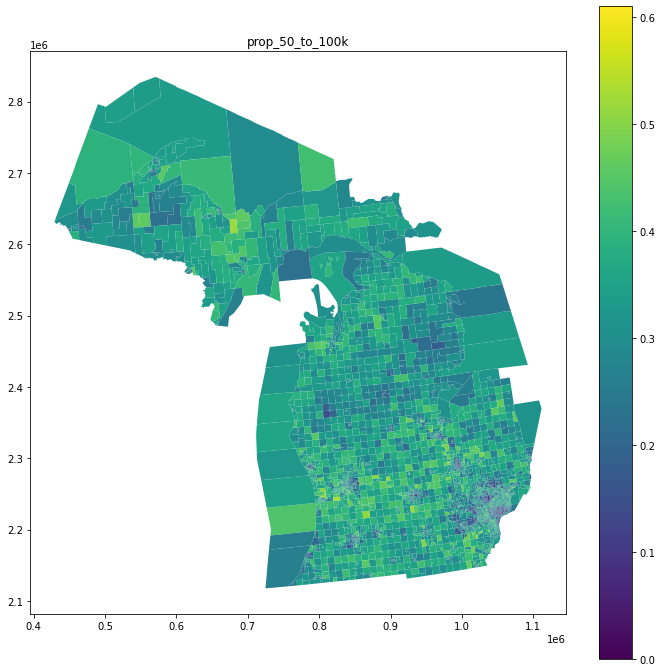

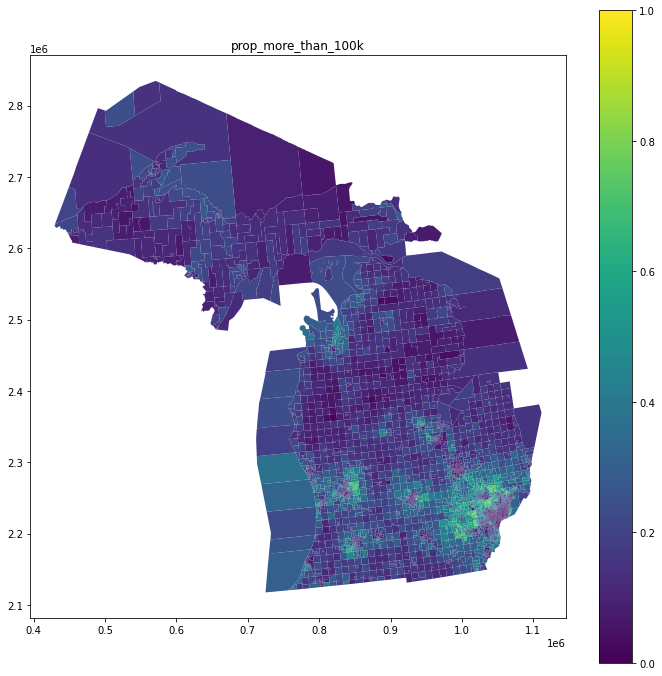

In [48]:
for label in vtds.columns[2:]:
    simple_choropleth(vtds,label)